In [31]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load data

In [7]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 
              'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 
              'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 
              'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(by=['sqft_living','price'])

# Set the L2 Penalty

In [8]:
l2_small_penalty = 1.5e-5

In [12]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = pd.DataFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature.apply(lambda x: x**1)

    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature.apply(lambda x: x**power)

    return poly_sframe

poly15_data = polynomial_sframe(sales['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, sales['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

Learned value for coefficients: [  1.24873306e+02  -4.77376011e-02   3.01446238e-05  -2.44419942e-09
  -1.94153675e-13   8.54085686e-18   1.51142121e-21   8.27979094e-26
   6.52603100e-31  -3.27895017e-34  -3.87962315e-38  -2.72437650e-42
  -1.07790800e-46   3.78242694e-51   1.39790296e-54]


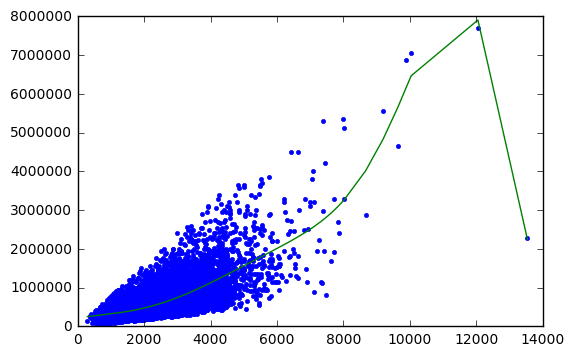

In [22]:
print "Learned value for coefficients:", model.coef_

plt.plot(poly15_data['power_1'],sales['price'],'.',
        poly15_data['power_1'], model.predict(poly15_data),'-')

# Splitted dataset

In [19]:
# dtype_dict same as above
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [20]:
l2_small_penalty=1e-9

Learned value for coefficients: [  5.44669383e+02  -3.55447588e-01   1.22446371e-04  -1.17175282e-08
  -3.90513036e-13  -1.39075670e-17   1.47860251e-20   6.87492204e-25
  -7.57204219e-29  -1.04097310e-32  -3.71844030e-37   3.39989328e-41
   5.56592014e-45   2.53761356e-49  -3.35152902e-53]


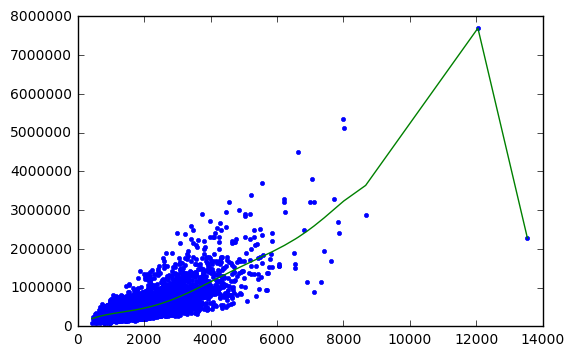

In [32]:
# Set 1 biggest p1
poly15_data = polynomial_sframe(set_1['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, set_1['price'])

print "Learned value for coefficients:", model.coef_

plt.plot(poly15_data['power_1'],set_1['price'],'.',
        poly15_data['power_1'], model.predict(poly15_data),'-')

Learned value for coefficients: [  8.59362583e+02  -8.18118179e-01   4.28879908e-04  -9.12770341e-08
  -2.69605205e-12   3.73980422e-15  -1.42712003e-19  -6.30794619e-23
  -1.44559599e-27   7.44321229e-31   9.25865759e-35   3.28052987e-41
  -1.29543520e-42  -1.38781284e-46   1.66546461e-50]


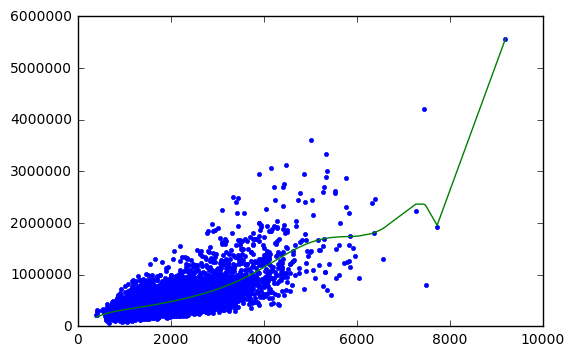

In [33]:
# Set 2
poly15_data = polynomial_sframe(set_2['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, set_2['price'])

print "Learned value for coefficients:", model.coef_

plt.plot(poly15_data['power_1'],set_2['price'],'.',
        poly15_data['power_1'], model.predict(poly15_data),'-')

Learned value for coefficients: [ -7.55395862e+02   9.75579413e-01  -4.58945924e-04   7.77957815e-08
   7.15014031e-12  -2.88602075e-15  -2.13677225e-20   3.38085171e-23
   2.19178238e-27  -1.97067825e-31  -4.15993129e-35  -1.80196179e-39
   3.19071140e-43   5.08456929e-47  -3.93304264e-51]


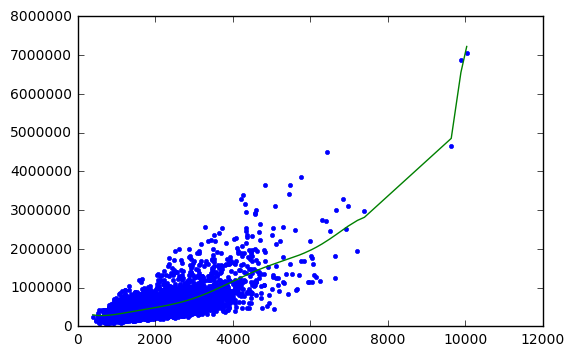

In [35]:
# Set 3
poly15_data = polynomial_sframe(set_3['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, set_3['price'])

print "Learned value for coefficients:", model.coef_

plt.plot(poly15_data['power_1'],set_3['price'],'.',
        poly15_data['power_1'], model.predict(poly15_data),'-')

Learned value for coefficients: [  1.11944566e+03  -9.83760136e-01   3.38770846e-04   3.60377370e-08
  -4.37814032e-11   5.77191660e-15   7.66795233e-19  -9.49297474e-23
  -1.96030834e-26  -2.10883927e-32   3.31005072e-34   3.47733931e-38
  -2.43039202e-42  -8.79553477e-46   6.44569783e-50]


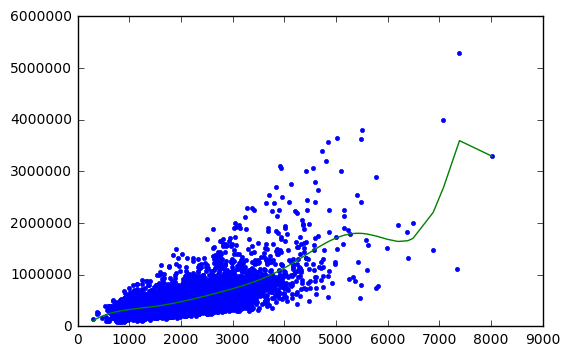

In [79]:
# Set 4 smallest p1
poly15_data = polynomial_sframe(set_4['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, set_4['price'])

print "Learned value for coefficients:", model.coef_

plt.plot(poly15_data['power_1'],set_4['price'],'.',
        poly15_data['power_1'], model.predict(poly15_data),'-')

# Introducing a much bigger L2 penalty

In [80]:
l2_large_penalty=1.23e2

Learned value for coefficients: [  2.32806803e+00   3.53621608e-04   3.31969692e-08   2.00082477e-12
   1.11492559e-16   6.57786122e-21   4.12939525e-25   2.70393755e-29
   1.81614763e-33   1.23824277e-37   8.51872481e-42   5.89455598e-46
   4.09542560e-50   2.85464889e-54   1.99547476e-58]


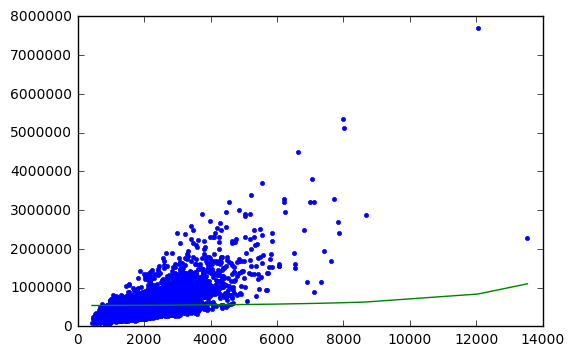

In [81]:
# Set 1 
poly15_data = polynomial_sframe(set_1['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model.fit(poly15_data, set_1['price'])

print "Learned value for coefficients:", model.coef_

plt.plot(poly15_data['power_1'],set_1['price'],'.',
        poly15_data['power_1'], model.predict(poly15_data),'-')

Learned value for coefficients: [  2.09756903e+00   3.90817483e-04   6.67189944e-08   8.90002997e-12
   9.72639877e-16   9.69733682e-20   9.50564475e-24   9.44491031e-28
   9.57191338e-32   9.86945155e-36   1.03101115e-39   1.08729784e-43
   1.15453748e-47   1.23211305e-51   1.31986696e-55]


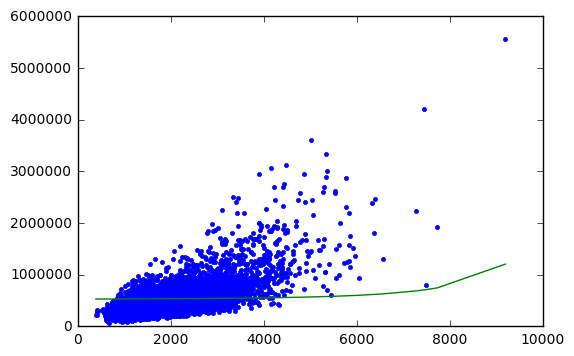

In [82]:
# Set 2
poly15_data = polynomial_sframe(set_2['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model.fit(poly15_data, set_2['price'])

print "Learned value for coefficients:", model.coef_

plt.plot(poly15_data['power_1'],set_2['price'],'.',
        poly15_data['power_1'], model.predict(poly15_data),'-')

Learned value for coefficients: [  2.28906258e+00   4.12472190e-04   6.08835345e-08   6.58572163e-12
   6.15278155e-16   5.64446634e-20   5.28834396e-24   5.07091402e-28
   4.94657273e-32   4.88043809e-36   4.85009106e-40   4.84161534e-44
   4.84635021e-48   4.85883628e-52   4.87558469e-56]


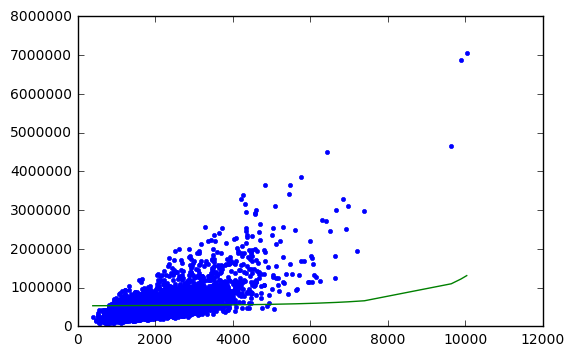

In [83]:
# Set 3 
poly15_data = polynomial_sframe(set_3['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model.fit(poly15_data, set_3['price'])

print "Learned value for coefficients:", model.coef_

plt.plot(poly15_data['power_1'],set_3['price'],'.',
        poly15_data['power_1'], model.predict(poly15_data),'-')

Learned value for coefficients: [  2.08596194e+00   4.05035772e-04   7.46864647e-08   1.13096608e-11
   1.45864442e-15   1.73561251e-19   2.01609632e-23   2.34605255e-27
   2.75636073e-31   3.27043069e-35   3.91046855e-39   4.70118041e-43
   5.67212304e-47   6.85958087e-51   8.30843630e-55]


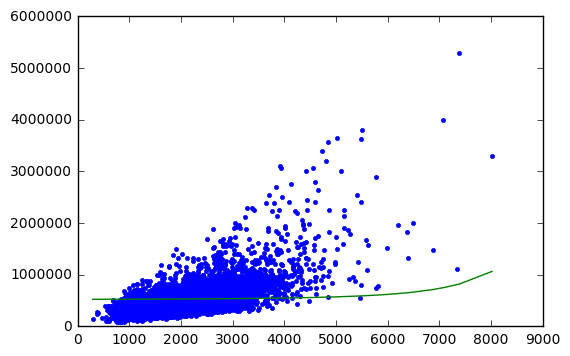

In [84]:
# Set 4
poly15_data = polynomial_sframe(set_4['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model.fit(poly15_data, set_4['price'])

print "Learned value for coefficients:", model.coef_

plt.plot(poly15_data['power_1'],set_4['price'],'.',
        poly15_data['power_1'], model.predict(poly15_data),'-')

# Selecting an L2 penalty via cross-validation

In [100]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)
train = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)


n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    #train_valid_shuffled[start:end+1]
    #train_valid_shuffled[0:start].append(train_valid_shuffled[end+1:n])
    print i, (start, end)

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


# k-fold cross validation implementation

In [86]:
def k_fold_cross_validation(k, l2_penalty, data, output):
    rss = 0
    n = len(data)
    for i in xrange(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
        validation_set = data[start:end+1]
        training_set = data[0:start].append(data[end+1:n])
        validation_output = output[start:end+1]
        training_output = output[0:start].append(output[end+1:n])
        
        model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
        model.fit(training_set, training_output)
        
        predictions = model.predict(validation_set)

        rss += np.sum(np.power(validation_output - predictions, 2))
    
    return rss/len(validation_set)

In [87]:
l2_penalty = np.logspace(3, 9, num=13)
poly15_data = polynomial_sframe(train_valid_shuffled['sqft_living'], 15) 

k = 10
RSS = {}

for i in range(len(l2_penalty)):
    rss = k_fold_cross_validation(k, l2_penalty[i], poly15_data, train_valid_shuffled['price'])
    RSS['L'+str(i)] = rss
    print 'Average RSS for L'+str(i)+'('+str(l2_penalty[i])+'):', rss

Average RSS for L0(1000.0): 1.36586268576e+12
Average RSS for L1(3162.27766017): 1.36955121576e+12
Average RSS for L2(10000.0): 1.37074416988e+12
Average RSS for L3(31622.7766017): 1.37112413149e+12
Average RSS for L4(100000.0): 1.37124455956e+12
Average RSS for L5(316227.766017): 1.37128266968e+12
Average RSS for L6(1000000.0): 1.37129472391e+12
Average RSS for L7(3162277.66017): 1.37129853606e+12
Average RSS for L8(10000000.0): 1.3712997416e+12
Average RSS for L9(31622776.6017): 1.37130012283e+12
Average RSS for L10(100000000.0): 1.37130024338e+12
Average RSS for L11(316227766.017): 1.37130028151e+12
Average RSS for L12(1000000000.0): 1.37130029356e+12


In [88]:
RSS
print "Min:", min(RSS, key=RSS.get)

Min: L0


RSS on test set: 2.83756877068e+14


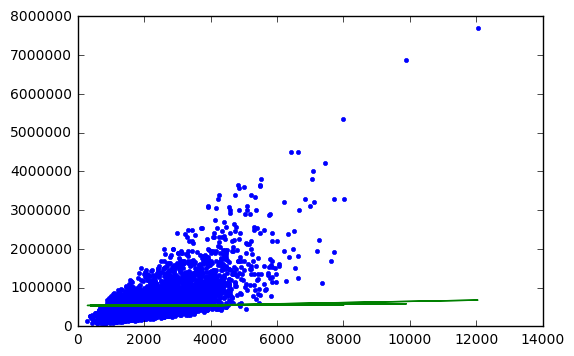

In [101]:
poly15_data = polynomial_sframe(train['sqft_living'], 15) 
model = linear_model.Ridge(alpha=1e+3, normalize=True)
model.fit(poly15_data, train['price'])

poly15_test = polynomial_sframe(test['sqft_living'], 15) 
predictions = model.predict(poly15_test)
rss = np.sum(np.power(test['price'] - predictions, 2))

print "RSS on test set:", rss

plt.plot(poly15_data['power_1'],train['price'],'.',
        poly15_data['power_1'], model.predict(poly15_data),'-')